In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from operator import itemgetter
from numpy.random import default_rng

p = 50
f = 10
sf = 5
r = 10

title = "p = " + str(p) + " f = " + str(f) + " sf = " + str(sf) + " r  =" + str(r)

# Generate Demand points
dx_points = default_rng().choice(p, size=(p - f), replace=False)
dy_points = default_rng().choice(p, size=(p - f), replace=False)

# Generate candidate sites
csx_points = default_rng().choice(p, size=(f), replace=False)
csy_points = default_rng().choice(p, size=(f), replace=False)

# Data to analize
demand_points = []
candidate_sites = []

for x in range(p - f):
    demand_points.append([dx_points[x], dy_points[x]])

for x in range(f):
    candidate_sites.append([csx_points[x], csy_points[x]])


# Divide data
non_selected_sites = list(candidate_sites)
non_covered_points = list(demand_points)


In [8]:
def showInitialPlot(d_points, cs_points):
    fig = plt.figure(figsize=(10,10))
    plt.title(title)
    plt.suptitle('Random Generated Demand and Candidate Points')
    if p >= 100:
        ms = 1
    else:
        ms = 20
    plt.scatter([i[0] for i in d_points], [i[1] for i in d_points], c='black', s=ms)
    plt.scatter([i[0] for i in cs_points], [i[1] for i in cs_points], c='red', s=ms + 15)
    plt.savefig("firstg.jpg")
    plt.show()


def addCirclesToPlot(d_points, cs_points, selected_points, of):
    fig = plt.figure(figsize=(10,10))
    ax = plt.gca()
    plt.title(title)
    plt.suptitle('Random Generated Demand and Candidate Points')
    if p >= 100:
        ms = 1
    else:
        ms = 20
    plt.scatter([i[0] for i in d_points], [i[1] for i in d_points], c='black', s=ms)
    plt.scatter([i[0] for i in cs_points], [i[1] for i in cs_points], c='red', s=ms + 15)
    for point in selected_points:
        circle = plt.Circle((point[0], point[1]), r, color='blue', fill=False)
        ax.add_patch(circle)
    plt.xlabel('Objective Function: ' + str(of))
    plt.savefig("secondg.jpg")
    plt.show()

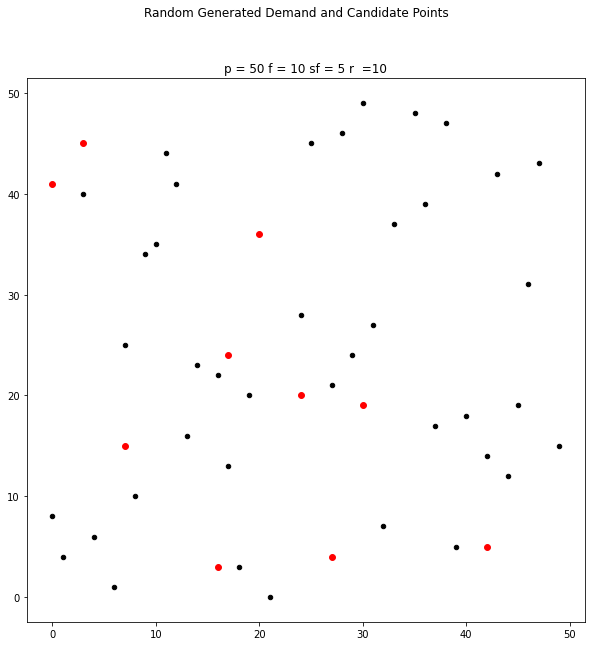

Selected sites: [[24, 20], [30, 19], [16, 3], [3, 45], [27, 4]]
Non selected sites [[20, 36], [7, 15], [42, 5], [17, 24], [0, 41]]
Covered points: [[27, 21], [29, 24], [19, 20], [31, 27], [16, 22], [24, 28], [37, 17], [21, 0], [18, 3], [12, 41], [11, 44], [3, 40], [32, 7]]
Non covered points: [[38, 47], [39, 5], [25, 45], [33, 37], [13, 16], [0, 8], [1, 4], [8, 10], [36, 39], [44, 12], [30, 49], [6, 1], [9, 34], [10, 35], [46, 31], [43, 42], [42, 14], [4, 6], [45, 19], [40, 18], [7, 25], [35, 48], [14, 23], [28, 46], [17, 13], [47, 43], [49, 15]]
Objective function: 13
Number of points covered by every site: [[[24, 20], 6], [[30, 19], 1], [[16, 3], 2], [[3, 45], 3], [[27, 4], 1]]


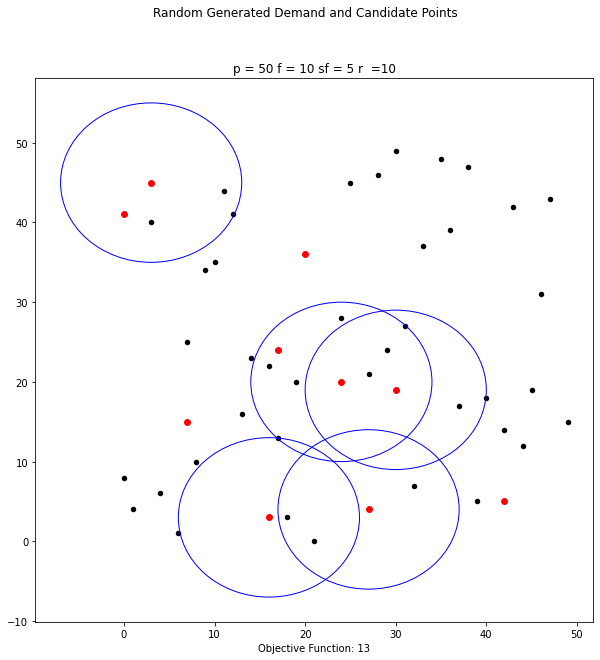

In [9]:
of = 0
selected_sites = []
covered_points = []
individual_covered = []
completed = True

while len(selected_sites)<sf:
    for site in non_selected_sites:
        if len(selected_sites)>=sf:
            completed = False
        count = 0
        for point in non_covered_points:
            d = sqrt((point[0] - site[0]) ** 2 + (site[1] - point[1]) ** 2)
            if d <= r and completed:
                    covered_points.append(point)
                    non_covered_points.remove(point)
                    count += 1
        if count > 0 and completed:
                selected_sites.append(site)
                non_selected_sites.remove(site)
                individual_covered.append([site, count])
                of += count
                break
        

showInitialPlot(demand_points, candidate_sites)
print("Selected sites:", selected_sites)
print("Non selected sites", non_selected_sites)
print("Covered points:", covered_points)
print("Non covered points:", non_covered_points)
print("Objective function:", of)
print("Number of points covered by every site:", individual_covered)
addCirclesToPlot(demand_points, candidate_sites, selected_sites, of)
            